In [1]:
# Function for integreating ODE and displaying results
%matplotlib inline
import scipy.integrate
from scipy.integrate import odeint
import matplotlib
import matplotlib.pylab as plt
matplotlib.rcParams['figure.figsize'] = (3,2)
matplotlib.rcParams['savefig.dpi'] = 300
import numpy as np

In [2]:
def f(y,t,a):
  return np.dot(a,y)
#    return [a[0,0]*y[0] + a[0,1]*y[1],\
#            a[1,0]*y[0] + a[1,1]*y[1]]


t  = scipy.linspace(0.,10.,100)

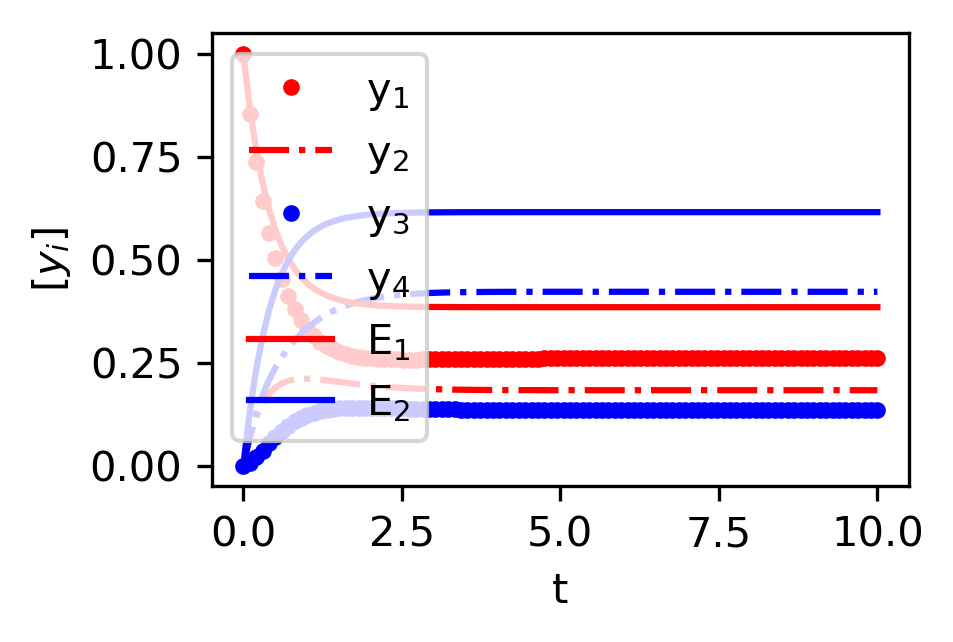

In [3]:
# Initial conc. 
y0 = [2,3]

# Jacobian

kf3=0.8
kb3=0.2
kf1=1.9
kb1=0.2
kf2=0.9
kb2=0.8
kf4=1.6
kb4=0.9

K1=kf1/kb1
K3=kf3/kb3

af1=kf4*K3/(1+K3)
ab1=kb4/(1+K1)
af2=kf2*K1/(1+K1)
ab2=kb2/(1+K3)

J1 = np.array([
  [-(kf3+kb2),kb3,0,kf2],
  [kf3,-(kb3+kf4),kb4,0],
  [0,kf4,-(kb4+kf1),kb1],
  [kb2,0,kf1,-(kf2+kb1)]
 ]) 

J2 = np.array([
  [-(af1+ab2),ab1+af2],
  [af1+ab2,-(ab1+af2)],
 ]) 


y1 = 1
y2 = 0
y3 = 0
y4 = 0

ly1=1
ly2=0

ys = np.array([y1,y2,y3,y4],dtype=np.float)
daSum = np.sum(ys)
y = scipy.integrate.odeint(f,ys,t,args=(J1,))

lys = np.array([ly1,ly2],dtype=np.float)
ldaSum = np.sum(lys)
lumy = scipy.integrate.odeint(f,lys,t,args=(J2,))



#print y[:,1]
#print y[:,0]
#print y[:,0]+y[:,1]-lumy[:,0]
#print y[:,2]+y[:,3]-lumy[:,1]
#print lumy[:,0]
matplotlib.rcParams['figure.figsize'] = (3,2)
matplotlib.rcParams['figure.dpi'] = 300
plt.plot(t,y[:,0],"r.",label="y$_1$")
plt.plot(t,y[:,1],"r-.",label="y$_2$")
plt.plot(t,y[:,2],"b.",label="y$_3$")
plt.plot(t,y[:,3],"b-.",label="y$_4$")
plt.plot(t,lumy[:,0],"r-",label="E$_1$")
plt.plot(t,lumy[:,1],"b-",label="E$_2$")
plt.ylabel("$[y_i]$")
plt.xlabel("t")
plt.legend(loc=0)

In [4]:
# common rate parameters from Cantilina1993
Kd=0.00224    
MgATP=0.0003
Pi=0.000001
#Ca=0.000005
MgADP=0.000001
Cai=0.000001
kf1=100000000.0
kb1=400.0
kf2=30.0
kb2=40.0
kf3=400000000.0
kb3=16.0
kf4=20000000.0
kb4=40.0
kf5=15 # note kf5, kb5, kf6 and kb6 need to be fitted based on 
kb5=7.5 # experimental pump rate data from Cantilina1993
kf6=7.5 #
kb6=7000000000 #
K1=kf1/kb1
K3=kf3/kb3
K2=kf2/kb2
K4=kf4/kb4

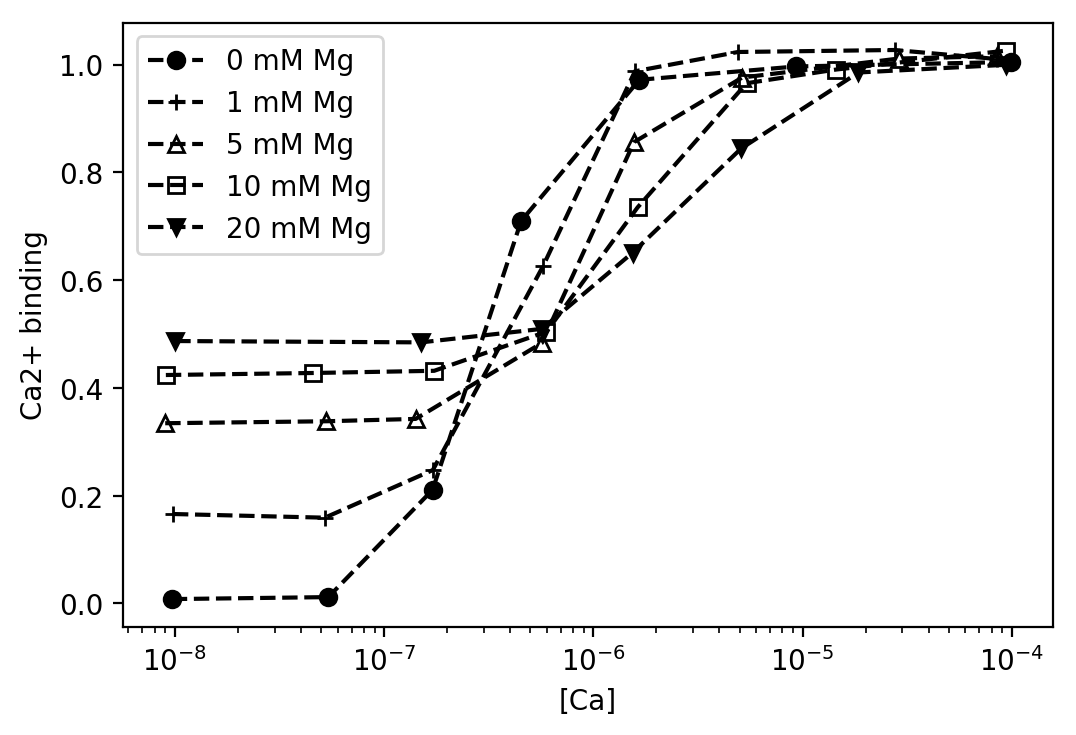

In [5]:
# the experimental data of Ca2+ binding dependance on Ca2+ at varying MgCl2 JOURNAL OF BIOLOCAL CHEMISTRY Vol. 257, No. 13,
# Issue of July 10, pp. 7366-7371, 1982
directory="/home/AD/bsu233/plotfigures/SERCA_MSM/E1Cabinding_underMg/"
case=["Mg0.csv","Mg1.csv","Mg5.csv","Mg10.csv","Mg20.csv"] # [Mg] = 0,1,5,10,20 mM
expdata=[]
for i,j in enumerate(case):
    
    file=directory + j
    expdata.append(np.loadtxt(file))
    
matplotlib.rcParams['figure.figsize']=6,4
matplotlib.rcParams['figure.dpi']=200

plt.plot(expdata[0][:,0],expdata[0][:,1],"k--o",label="0 mM Mg")
plt.plot(expdata[1][:,0],expdata[1][:,1],"k--+",label="1 mM Mg")
plt.plot(expdata[2][:,0],expdata[2][:,1],"k--^",fillstyle="none",label="5 mM Mg")
plt.plot(expdata[3][:,0],expdata[3][:,1],"k--s",fillstyle="none",label="10 mM Mg")
plt.plot(expdata[4][:,0],expdata[4][:,1],"k--v",label="20 mM Mg")
plt.xscale('log')
plt.ylabel("Ca2+ binding")
plt.xlabel("[Ca]")
plt.legend()

Text(0,0.5,'Pump Rate(1/S)')

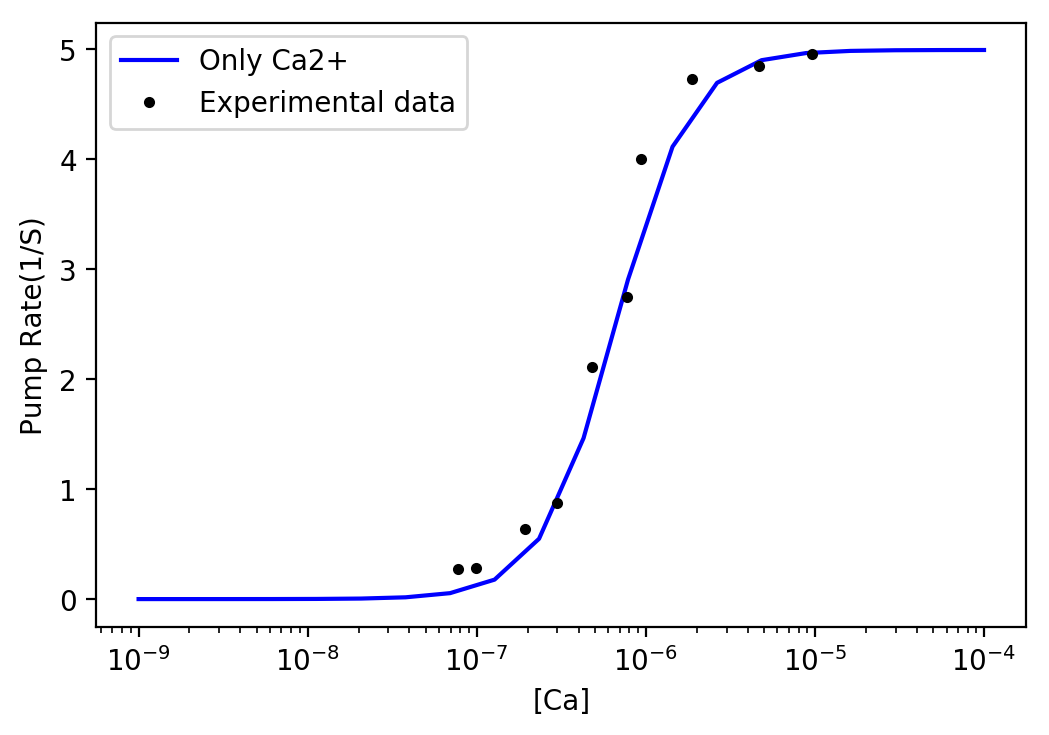

In [9]:
cs=10**np.linspace(-9, -4, num=20)

# two state model ( only Ca2+ ) turn over rate 
# in Tran's paper, for two-state model, the expression of turin over is:
#  V= (af1*af2-ab1*ab2)/(ab1+ab2+af1+af2)

# experimental data from Cantilina's paper (figure 3A, nomalized to ensure maxmium is 5/S-1)
c0=[7.76046e-08,9.94839e-08,1.92927e-07,2.97960e-07,4.79622e-07,7.72041e-07,9.30121e-07,1.88000e-06,4.67372e-06,9.64428e-06]
r0=[0.272727,0.285714,0.636364,0.870130,2.10390,2.74026,4,4.72727,4.84416,4.94805]


def cRate(Ca,kf5,kb5,kf6,kb6):     
    af1=kf5*K1*K2*K3*K4*Ca*Ca*MgATP/(1+K1*Ca+K1*K2*Ca+K1*K2*K3*Ca*Ca+K1*K2*K3*K4*Ca*Ca*MgATP)
    ab1=kb5*MgADP/(1+Kd/Cai+Kd*Kd/(Cai*Cai))
    af2=(kf6*Kd*Kd/(Cai*Cai))/(1+(Kd/Cai)+Kd*Kd/(Cai*Cai))
    ab2=kb6*Pi/(1+K1*Ca+K1*K2*Ca+K1*K2*K3*Ca*Ca+K1*K2*K3*K4*Ca*Ca*MgATP)
    
    return (af1*af2-ab1*ab2)/(ab1+ab2+af1+af2)


# define the pump rate for Caonly model
vcRate = np.vectorize(cRate)

plt.plot(cs,vcRate(cs,15,7.5,7.5,7000000000),"b-",label="Only Ca2+") # Now we know the value of K5 and K6
plt.plot(c0,r0,"k.",label="Experimental data")
plt.xscale('log')
plt.legend(loc=0)
plt.xlabel("[Ca]")
plt.ylabel("Pump Rate(1/S)")

In [10]:
# now based on the paper, we will use the sum of E1*Mg and E1*2Ca to characterize the saturation of SERCA \
# based on interperation of Guillain1982
def MgIKT_Binding_withE1Mg(Ca,Mg,Kdmg,K,Kdk):
  
    e1mg_nominator= Kdk*Mg
    e1mg_denominator= Kdk*Mg + (Kdk +Ca*Ca*K1*K2*K3 +Ca*K1*K2+Ca*K1+K)*Kdmg
    
    nominator = Ca*Ca*K1*K2*K3*Kdmg
    denominator = Ca*Ca*Kdmg*K1*K2*K3 + Ca*Kdmg*K1*K2 + Ca*Kdmg*K1 + Kdmg*K + Kdk*Mg + Kdk*Kdmg
    return nominator/denominator + e1mg_nominator/e1mg_denominator


def MgTKI_Binding_withE1Mg(Ca,Mg,Kdmg,K,Kdk):
    e1mg_nominator= Kdk*Mg
    e1mg_denominator= Kdk*Mg + (Kdk+K)*Kdmg + Ca*Ca*K1*K2*K3*Kdk + Ca*K1*K2*Kdk +Ca*K1*Kdk
    
    nominator = Ca*Ca*K1*K2*K3*Kdk
    denominator = Ca*Ca*Kdk*K1*K2*K3 + Ca*Kdk*K1*K2 + Ca*Kdk*K1 + Kdmg*K + Kdk*Mg + Kdk*Kdmg
    return nominator/denominator + e1mg_nominator/e1mg_denominator

def MgIKI_Binding_withE1Mg(Ca,Mg,Kdmg,K,Kdk):
    e1mg_nominator= K*Kdmg
    e1mg_denominator= Kdk*Mg + (Ca*Ca*K1*K2*K3*Kdk + Ca*K1*K2*Kdk +Ca*K1*Kdk+Kdk+K)*Kdmg
    
    nominator = Ca*Ca*K1*K2*K3*Kdk*Kdmg
    denominator = Kdk*Mg + (Ca*Ca*K1*K2*K3*Kdk + Ca*K1*K2*Kdk + Ca*K1*Kdk + Kdk + K)*Kdmg
    return nominator/denominator +  e1mg_nominator/e1mg_denominator

def MgTKT_Binding_withE1Mg(Ca,Mg,Kdmg,K,Kdk):
    e1mg_nominator= (Kdk*Mg*Mg + (Kdk+K)*Kdmg*Mg +K*Kdmg*Kdmg)*Kdk +K*Kdk*Kdmg*Mg +K*K*Kdmg*Kdmg 
    e1mg_denominator= (Kdk*Mg*Mg +(2*Kdk+K)*Kdmg*Mg + (Kdk+K)*Kdmg*Kdmg)*Kdk + (K*Kdk*Kdmg + (K1*K2*(Ca\
                *Ca*K3+Ca)+Ca*K1)*Kdk*Kdk)*Mg + (K*Kdk+K*K)*Kdmg*Kdmg + (K*K1*K2*(Ca*Ca*K3+Ca)+Ca*K*K1)*Kdk*Kdmg
    
    
    nominator = Ca*Ca*K1*K2*K3*Kdk*Kdk*Mg + Ca*Ca*K*K1*K2*K3*Kdk*Kdmg
    denominator = (Kdk*Mg*Mg +(2*Kdk+K)*Kdmg*Mg + (Kdk+K)*Kdmg*Kdmg)*Kdk + (K*Kdk*Kdmg + (K1*K2*(Ca\
                *Ca*K3+Ca)+Ca*K1)*Kdk*Kdk)*Mg + (K*Kdk+K*K)*Kdmg*Kdmg + (K*K1*K2*(Ca*Ca*K3+Ca)+Ca*K*K1)*Kdk*Kdmg
    return nominator/denominator +  e1mg_nominator/e1mg_denominator


In [11]:
vMgIKT_Binding_E1Mg = np.vectorize(MgIKT_Binding_withE1Mg)
vMgTKI_Binding_E1Mg = np.vectorize(MgTKI_Binding_withE1Mg)
vMgIKI_Binding_E1Mg = np.vectorize(MgIKI_Binding_withE1Mg)
vMgTKT_Binding_E1Mg = np.vectorize(MgTKT_Binding_withE1Mg)

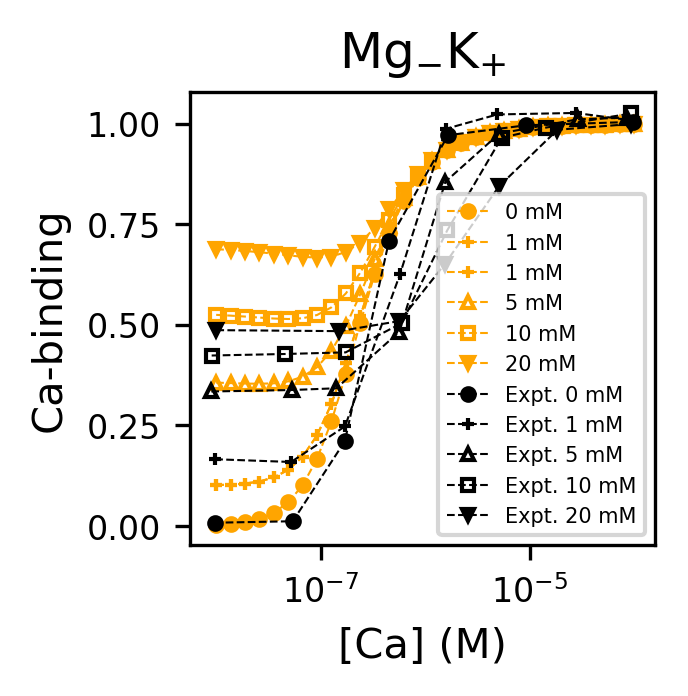

In [20]:
matplotlib.rcParams['figure.figsize']=2,2
matplotlib.rcParams['figure.dpi']=300
lw=0.5
ms=3
cs = 10**np.linspace(-8,-4,30)
#plt.plot(cs,vCa_only_Binding(cs),"--",label="Ca$_{only}$")
plt.plot(cs,vMgIKT_Binding_E1Mg(cs,0.000,0.0005,0.15,0.009),"--o",color="orange",label="0 mM",lw=lw,markersize=ms)
plt.plot(cs,vMgIKT_Binding_E1Mg(cs,0.001,0.0005,0.15,0.009),"--+",color="orange",label="1 mM",lw=lw,markersize=ms)
plt.plot(cs,vMgIKT_Binding_E1Mg(cs,0.001,0.0005,0.15,0.009),"--+",color="orange",label="1 mM",lw=lw,markersize=ms)
plt.plot(cs,vMgIKT_Binding_E1Mg(cs,0.005,0.0005,0.15,0.009),"--^",color="orange",fillstyle="none",label="5 mM ",lw=lw,markersize=ms)
plt.plot(cs,vMgIKT_Binding_E1Mg(cs,0.010,0.0005,0.15,0.009),"--s",color="orange",fillstyle="none",label="10 mM",lw=lw,markersize=ms)
plt.plot(cs,vMgIKT_Binding_E1Mg(cs,0.020,0.0005,0.15,0.009),"--v",color="orange",label="20 mM",lw=lw,markersize=ms)

plt.plot(expdata[0][:,0],expdata[0][:,1],"k--o",label="Expt. 0 mM",lw=lw,markersize=ms)
plt.plot(expdata[1][:,0],expdata[1][:,1],"k--+",label="Expt. 1 mM",lw=lw,markersize=ms)
plt.plot(expdata[2][:,0],expdata[2][:,1],"k--^",fillstyle="none",label="Expt. 5 mM",lw=lw,markersize=ms)
plt.plot(expdata[3][:,0],expdata[3][:,1],"k--s",fillstyle="none",label="Expt. 10 mM",lw=lw,markersize=ms)
plt.plot(expdata[4][:,0],expdata[4][:,1],"k--v",label="Expt. 20 mM",markersize=ms,lw=lw)

plt.legend(fontsize=5)
plt.title("Mg$_{-}$K$_{+}$")
plt.xscale('log')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("[Ca] (M)")
plt.ylabel("Ca-binding")
plt.savefig("11.png", bbox_inches='tight')

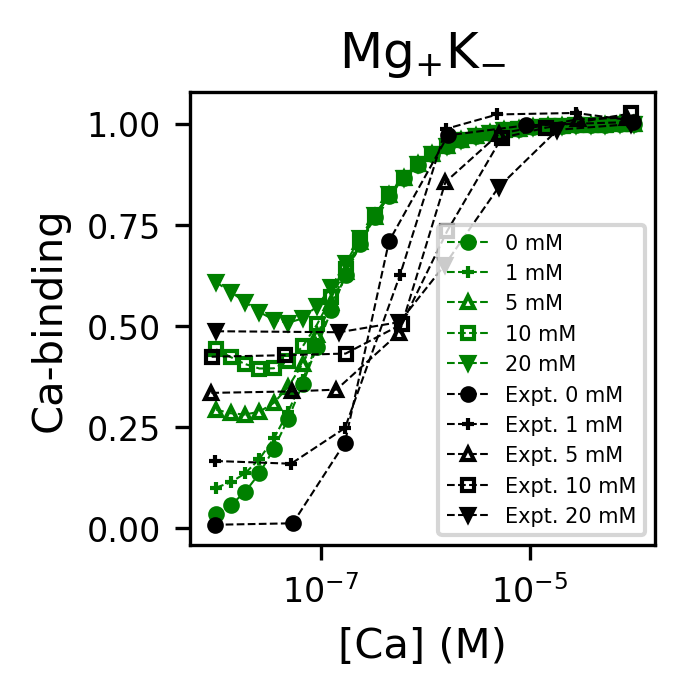

In [21]:
plt.plot(cs,vMgTKI_Binding_E1Mg(cs,0.000,0.0005,0.15,0.009),"g--o",label="0 mM",lw=lw,markersize=ms)
plt.plot(cs,vMgTKI_Binding_E1Mg(cs,0.001,0.0005,0.15,0.009),"g--+",label="1 mM",lw=lw,markersize=ms)
plt.plot(cs,vMgTKI_Binding_E1Mg(cs,0.005,0.0005,0.15,0.009),"g--^",fillstyle="none",label="5 mM ",lw=lw,markersize=ms)
plt.plot(cs,vMgTKI_Binding_E1Mg(cs,0.010,0.0005,0.15,0.009),"g--s",fillstyle="none",label="10 mM",lw=lw,markersize=ms)
plt.plot(cs,vMgTKI_Binding_E1Mg(cs,0.020,0.0005,0.15,0.009),"g--v",label="20 mM",lw=lw,markersize=ms)

plt.plot(expdata[0][:,0],expdata[0][:,1],"k--o",label="Expt. 0 mM",lw=lw,markersize=ms)
plt.plot(expdata[1][:,0],expdata[1][:,1],"k--+",label="Expt. 1 mM",lw=lw,markersize=ms)
plt.plot(expdata[2][:,0],expdata[2][:,1],"k--^",fillstyle="none",label="Expt. 5 mM",lw=lw,markersize=ms)
plt.plot(expdata[3][:,0],expdata[3][:,1],"k--s",fillstyle="none",label="Expt. 10 mM",lw=lw,markersize=ms)
plt.plot(expdata[4][:,0],expdata[4][:,1],"k--v",label="Expt. 20 mM",lw=lw,markersize=ms)

plt.legend(fontsize=5)
plt.title("Mg$_{+}$K$_{-}$")
plt.xscale('log')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("[Ca] (M)")
plt.ylabel("Ca-binding")
plt.savefig("22.png", bbox_inches='tight')

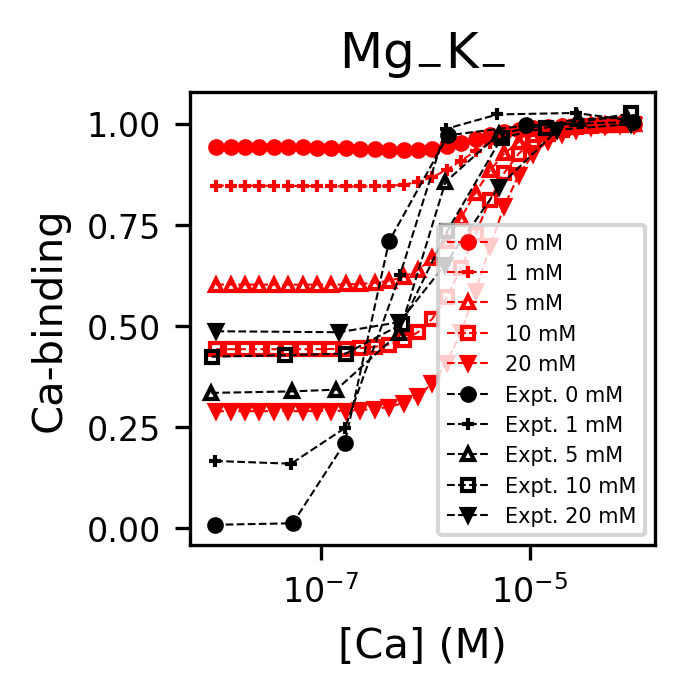

In [22]:
plt.plot(cs,vMgIKI_Binding_E1Mg(cs,0.000,0.0005,0.15,0.009),"r--o",label="0 mM",lw=lw,markersize=ms)
plt.plot(cs,vMgIKI_Binding_E1Mg(cs,0.001,0.0005,0.15,0.009),"r--+",label="1 mM",lw=lw,markersize=ms)
plt.plot(cs,vMgIKI_Binding_E1Mg(cs,0.005,0.0005,0.15,0.009),"r--^",fillstyle="none",label="5 mM",lw=lw,markersize=ms)
plt.plot(cs,vMgIKI_Binding_E1Mg(cs,0.010,0.0005,0.15,0.009),"r--s",fillstyle="none",label="10 mM",lw=lw,markersize=ms)
plt.plot(cs,vMgIKI_Binding_E1Mg(cs,0.020,0.0005,0.15,0.009),"r--v",label="20 mM",lw=lw,markersize=ms)

plt.plot(expdata[0][:,0],expdata[0][:,1],"k--o",label="Expt. 0 mM",lw=lw,markersize=ms)
plt.plot(expdata[1][:,0],expdata[1][:,1],"k--+",label="Expt. 1 mM",lw=lw,markersize=ms)
plt.plot(expdata[2][:,0],expdata[2][:,1],"k--^",fillstyle="none",label="Expt. 5 mM",lw=lw,markersize=ms)
plt.plot(expdata[3][:,0],expdata[3][:,1],"k--s",fillstyle="none",label="Expt. 10 mM",lw=lw,markersize=ms)
plt.plot(expdata[4][:,0],expdata[4][:,1],"k--v",label="Expt. 20 mM",lw=lw,markersize=ms)

plt.legend(fontsize=5)
plt.title("Mg$_{-}$K$_{-}$")
plt.xscale('log')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("[Ca] (M)")
plt.ylabel("Ca-binding")
plt.savefig("33.png", bbox_inches='tight')

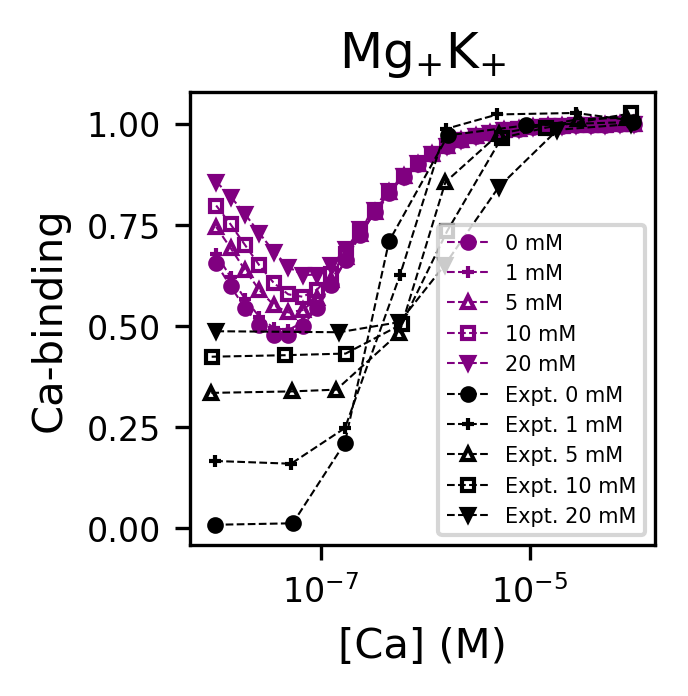

In [23]:
plt.plot(cs,vMgTKT_Binding_E1Mg(cs,0.000,0.0005,0.15,0.009),"--o",color="purple",label="0 mM",lw=lw,markersize=ms)
plt.plot(cs,vMgTKT_Binding_E1Mg(cs,0.001,0.0005,0.15,0.009),"--+",color="purple",label="1 mM",lw=lw,markersize=ms)
plt.plot(cs,vMgTKT_Binding_E1Mg(cs,0.005,0.0005,0.15,0.009),"--^",color="purple",fillstyle="none",label="5 mM",lw=lw,markersize=ms)
plt.plot(cs,vMgTKT_Binding_E1Mg(cs,0.010,0.0005,0.15,0.009),"--s",color="purple",fillstyle="none",label="10 mM",lw=lw,markersize=ms)
plt.plot(cs,vMgTKT_Binding_E1Mg(cs,0.020,0.0005,0.15,0.009),"--v",color="purple",label="20 mM",lw=lw,markersize=ms)

plt.plot(expdata[0][:,0],expdata[0][:,1],"k--o",label="Expt. 0 mM",lw=lw,markersize=ms)
plt.plot(expdata[1][:,0],expdata[1][:,1],"k--+",label="Expt. 1 mM",lw=lw,markersize=ms)
plt.plot(expdata[2][:,0],expdata[2][:,1],"k--^",fillstyle="none",label="Expt. 5 mM",lw=lw,markersize=ms)
plt.plot(expdata[3][:,0],expdata[3][:,1],"k--s",fillstyle="none",label="Expt. 10 mM",lw=lw,markersize=ms)
plt.plot(expdata[4][:,0],expdata[4][:,1],"k--v",label="Expt. 20 mM",lw=lw,markersize=ms)


plt.legend(fontsize=5)
plt.title("Mg$_{+}$K$_{+}$")
plt.xscale('log')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("[Ca] (M)")
plt.ylabel("Ca-binding")
plt.savefig("44.png", bbox_inches='tight')

In [138]:
aa = np.array([2,3,4,5,6])
bb = np.array([5,5,2,3,3])
print ((aa-bb)**2)

[9 4 4 4 9]


In [139]:
# use the chi^2 test to check which most is closest to expt.
# error = (interpolate(model,expCa) - expValue)^2

exptCa=expdata[0][:,0]

def chicheck(model):
    summ=0
    mgcon=[0,0.001,0.005,0.010,0.020]
    for i in np.arange(5):
        exptCa = expdata[i][:,0]
        exptCa_value = expdata[i][:,1]
        
        yp = model(cs,mgcon[i],0.0005,0.15,0.009)
        predicted= np.interp(exptCa,cs,yp)
        summ += np.sum( (exptCa_value - predicted)**2)
    
    return np.sqrt(summ/(5*len(exptCa)))



In [140]:
print (exptCa)

[9.66514e-09 5.41003e-08 1.70434e-07 4.51708e-07 1.65769e-06 9.29448e-06
 9.86635e-05]


In [141]:
MgTKT = chicheck(vMgTKT_Binding_E1Mg)
MgIKI = chicheck(vMgIKI_Binding_E1Mg)
MgTKI = chicheck(vMgTKI_Binding_E1Mg)
MgIKT = chicheck(vMgIKT_Binding_E1Mg)

print (MgTKT,MgIKI,MgIKT,MgTKI)
#print (MgTKT1 + MgTKT2 + MgTKT3 + MgTKT4 + MgTKT5)

0.27741906928100274 0.34510919618337166 0.1364029168136691 0.18168279906185272


0.18168279906185272
[0.75077507 1.        ]


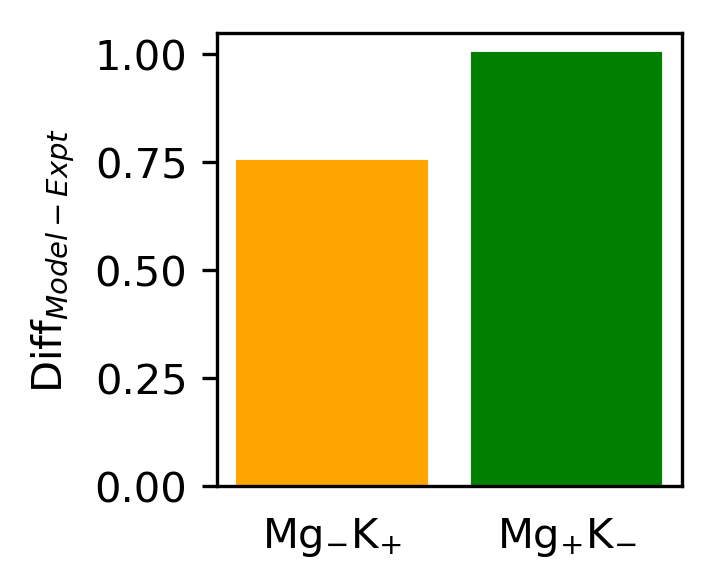

In [147]:
matplotlib.rcParams['figure.figsize']=2,2
#matplotlib.rcParams['figure.dpi']=300


color=['orange','green','r','purple']
color=['orange','green']

width=0.6
chivalue=(MgIKT,MgTKI,MgIKI,MgTKT)
chivalue=(MgIKT,MgTKI)
print (np.max(chivalue))
new=np.asarray(chivalue)
print (new/np.max(chivalue))
#chivalue= chivalue/np.maximum(chivalue)

barlist=plt.bar(np.arange(2),new/np.max(chivalue))
for i in np.arange(2):
    barlist[i].set_color(color[i])
plt.ylabel("Diff$_{Model -Expt}$")
plt.xticks([0,1],("Mg$_{-}$K$_{+}$","Mg$_{+}$K$_{-}$"))
#plt.legend((barlist[0],barlist[1]),("Mg$_{-}$K$_{+}$","Mg$_{+}$K$_{-}$"),fontsize=8)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
plt.savefig("55.png", bbox_inches='tight')

In [30]:
#turnover rate

legends=["Mg$_{-}$K$_{+}$","Mg$_{+}$K$_{-}$","Mg$_{-}$K$_{-}$","Mg$_{+}$K$_{+}$"]
def cRate(Ca,kf5,kb5,kf6,kb6):
   
     
    af1=kf5*K1*K2*K3*K4*Ca*Ca*MgATP/(1+K1*Ca+K1*K2*Ca+K1*K2*K3*Ca*Ca+K1*K2*K3*K4*Ca*Ca*MgATP)
    ab1=kb5*MgADP/(1+Kd/Cai+Kd*Kd/(Cai*Cai))
    af2=(kf6*Kd*Kd/(Cai*Cai))/(1+(Kd/Cai)+Kd*Kd/(Cai*Cai))
    ab2=kb6*Pi/(1+K1*Ca+K1*K2*Ca+K1*K2*K3*Ca*Ca+K1*K2*K3*K4*Ca*Ca*MgATP)
    
    return (af1*af2-ab1*ab2)/(ab1+ab2+af1+af2)


def MgIKT_Rate(Ca,Mg,Kdmg,K,Kdk):
    ad1= Kdmg/Mg
    ad2= K/Kdk
    
    af1=kf5*ad1*ad2*K1*K2*K3*K4*Ca*Ca*MgATP/(1+ad1+ad1*ad2+ad1*ad2*K1*Ca+ad1*ad2*K1*K2*Ca+ad1*ad2*K1*K2*K3*Ca*Ca+ad1*ad2*K1*K2*K3*K4*Ca*Ca*MgATP)
    ab1=kb5*MgADP/(1+Kd/Cai+Kd*Kd/(Cai*Cai))
    af2=(kf6*Kd*Kd/(Cai*Cai))/(1+(Kd/Cai)+Kd*Kd/(Cai*Cai))
    ab2=kb6*Pi/(1+ad1+ad1*ad2+ad1*ad2*K1*Ca+ad1*ad2*K1*K2*Ca+ad1*ad2*K1*K2*K3*Ca*Ca+ad1*ad2*K1*K2*K3*K4*Ca*Ca*MgATP)
    
    return (af1*af2-ab1*ab2)/(ab1+ab2+af1+af2)


def MgTKI_Rate(Ca,Mg,Kdmg,K,Kdk):
    ad1= Kdk/K
    ad2= Mg/Kdmg
    
    af1=kf5*ad1*ad2*K1*K2*K3*K4*Ca*Ca*MgATP/(1+ad1+ad1*ad2+ad1*ad2*K1*Ca+ad1*ad2*K1*K2*Ca+ad1*ad2*K1*K2*K3*Ca*Ca+ad1*ad2*K1*K2*K3*K4*Ca*Ca*MgATP)
    ab1=kb5*MgADP/(1+Kd/Cai+Kd*Kd/(Cai*Cai))
    af2=(kf6*Kd*Kd/(Cai*Cai))/(1+(Kd/Cai)+Kd*Kd/(Cai*Cai))
    ab2=kb6*Pi/(1+ad1+ad1*ad2+ad1*ad2*K1*Ca+ad1*ad2*K1*K2*Ca+ad1*ad2*K1*K2*K3*Ca*Ca+ad1*ad2*K1*K2*K3*K4*Ca*Ca*MgATP)
    
    return (af1*af2-ab1*ab2)/(ab1+ab2+af1+af2)


def MgIKI_Rate(Ca,Mg,Kdmg,K,Kdk):
    ad1=Kdmg/Mg
    ad2=Kdk/K
    
    af1=kf5*ad1*ad2*K1*K2*K3*K4*Ca*Ca*MgATP/(1+ad1+ad1*ad2+ad1*ad2*K1*Ca+ad1*ad2*K1*K2*Ca+ad1*ad2*K1*K2*K3*Ca*Ca+ad1*ad2*K1*K2*K3*K4*Ca*Ca*MgATP)
    ab1=kb5*MgADP/(1+Kd/Cai+Kd*Kd/(Cai*Cai))
    af2=(kf6*Kd*Kd/(Cai*Cai))/(1+(Kd/Cai)+Kd*Kd/(Cai*Cai))
    ab2=kb6*Pi/(1+ad1+ad1*ad2+ad1*ad2*K1*Ca+ad1*ad2*K1*K2*Ca+ad1*ad2*K1*K2*K3*Ca*Ca+ad1*ad2*K1*K2*K3*K4*Ca*Ca*MgATP)
    
    return (af1*af2-ab1*ab2)/(ab1+ab2+af1+af2)



def MgTKT_Rate(Ca,Mg,Kdmg,K,Kdk):
    kf0=kf1*Ca*Kdk*Mg/(K*Kdmg + Kdk*Kdmg + Kdk*Mg)
    kb0=Kdk*K*Kdmg/(K*Kdmg+Kdk*Mg)
    
    ad0=K/kb0
    ad1=kf0/(kb1*Mg)
    
    af1=kf5*ad0*ad1*K2*K3*K4*Ca*MgATP/(1+ad0+ad0*ad1+ad0*ad1*K2+ad0*ad1*K2*K3*Ca+ad0*ad1*K2*K3*K4*Ca*MgATP)
    ab1=kb5*MgADP/(1+Kd/Cai+Kd*Kd/(Cai*Cai))
    af2=(kf6*Kd*Kd/(Cai*Cai))/(1+(Kd/Cai)+Kd*Kd/(Cai*Cai))
    ab2=kb6*Pi/(1+ad0+ad0*ad1+ad0*ad1*K2+ad0*ad1*K2*K3*Ca+ad0*ad1*K2*K3*K4*Ca*MgATP)
    
    return (af1*af2-ab1*ab2)/(ab1+ab2+af1+af2)

In [31]:
vcRate = np.vectorize(cRate)
vMgTKI_Rate = np.vectorize(MgTKI_Rate)
vMgIKI_Rate = np.vectorize(MgIKI_Rate)
vMgTKT_Rate = np.vectorize(MgTKT_Rate)
vMgIKT_Rate = np.vectorize(MgIKT_Rate)

[1.e-08 1.e-07 1.e-06 1.e-05 1.e-04]


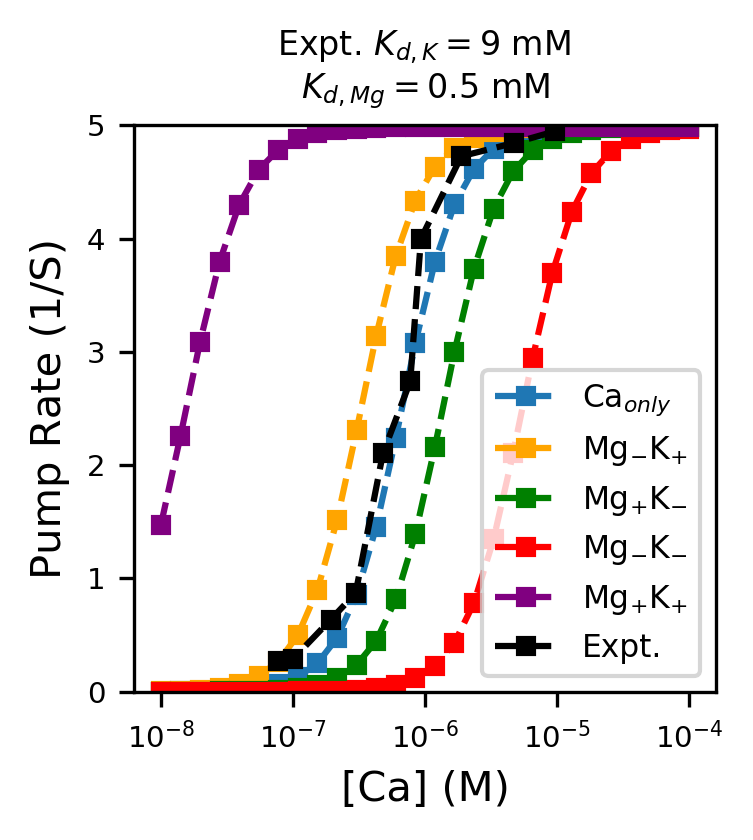

In [34]:
cs = 10**np.linspace(-8,-4,28)
xtickss = 10**np.linspace(-8,-4,5)
print (xtickss)
matplotlib.rcParams['figure.figsize']=2.5,2.5
plt.plot(cs,vcRate(cs,15,7.5,7.5,7000000000),"--s",ms=4,label="Ca$_{only}$") # Now we know the value of K5 and K6
plt.plot(cs,vMgIKT_Rate(cs,0.002,0.0005,0.15,0.009),"--s",color="orange",ms=4,label=legends[0])
plt.plot(cs,vMgTKI_Rate(cs,0.002,0.0005,0.15,0.009),"--s",color="green",ms=4,label=legends[1])
plt.plot(cs,vMgIKI_Rate(cs,0.002,0.0005,0.15,0.009),"--s",color="red",ms=4,label=legends[2])
plt.plot(cs,vMgTKT_Rate(cs,0.002,0.0005,0.15,0.009),"--s",color="purple",ms=4,label=legends[3])
plt.plot(c0,r0,"--s",ms=4,color='black',label="Expt.")
plt.xscale('log')
plt.legend(fontsize=7.5)
plt.xlabel('[Ca] (M)')
plt.ylim([0,5])
plt.xticks(xtickss,fontsize=7)
plt.yticks(fontsize=7)
plt.ylabel('Pump Rate (1/S)')
plt.title('Expt. $K_{d,K}=9$ mM \n$K_{d,Mg}=0.5$ mM',fontsize=8)
plt.savefig("66.png", bbox_inches='tight')

Text(0.5,1,'Fitted $K_{d,K}=100$ mM \n$K_{d,Mg}=2$ mM')

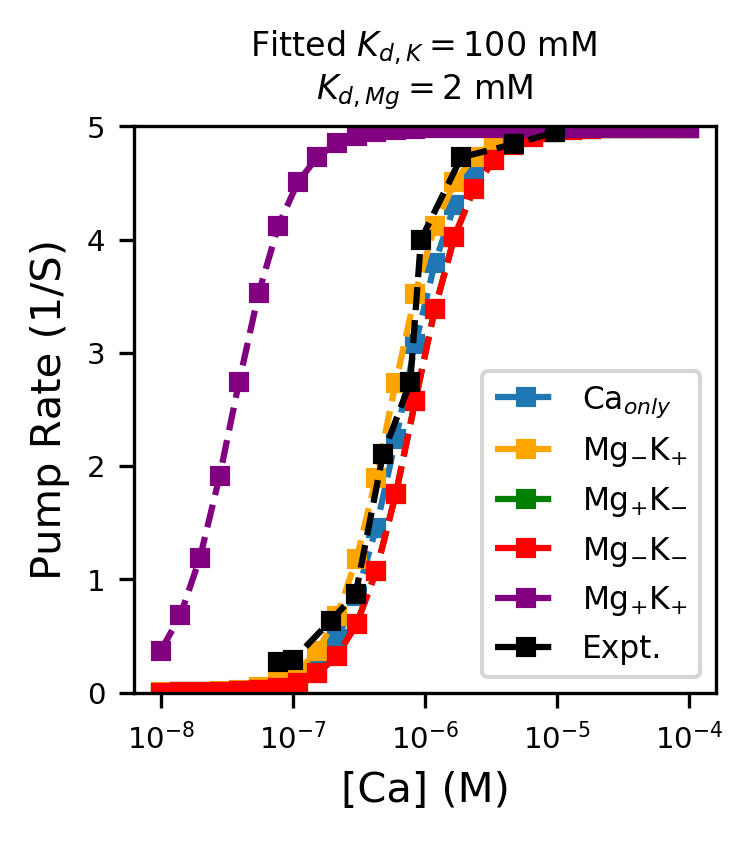

In [35]:
matplotlib.rcParams['figure.figsize']=2.5,2.5
plt.plot(cs,vcRate(cs,15,7.5,7.5,7000000000),"--s",ms=4,label="Ca$_{only}$") # Now we know the value of K5 and K6
plt.plot(cs,vMgIKT_Rate(cs,0.002,0.002,0.15,0.1),"--s",color="orange",ms=4,label=legends[0])
plt.plot(cs,vMgTKI_Rate(cs,0.002,0.002,0.15,0.1),"--s",color="green",ms=4,label=legends[1])
plt.plot(cs,vMgIKI_Rate(cs,0.002,0.002,0.15,0.1),"--s",color="red",ms=4,label=legends[2])
plt.plot(cs,vMgTKT_Rate(cs,0.002,0.002,0.15,0.1),"--s",color="purple",ms=4,label=legends[3])
plt.plot(c0,r0,"--s",ms=4,color='black',label="Expt.")
plt.xscale('log')
plt.legend(fontsize=7.5)
plt.xlabel('[Ca] (M)')
plt.ylim([0,5])
plt.xticks(xtickss,fontsize=7)
plt.yticks(fontsize=7)
plt.ylabel('Pump Rate (1/S)')
plt.title('Fitted $K_{d,K}=100$ mM \n$K_{d,Mg}=2$ mM',fontsize=8)

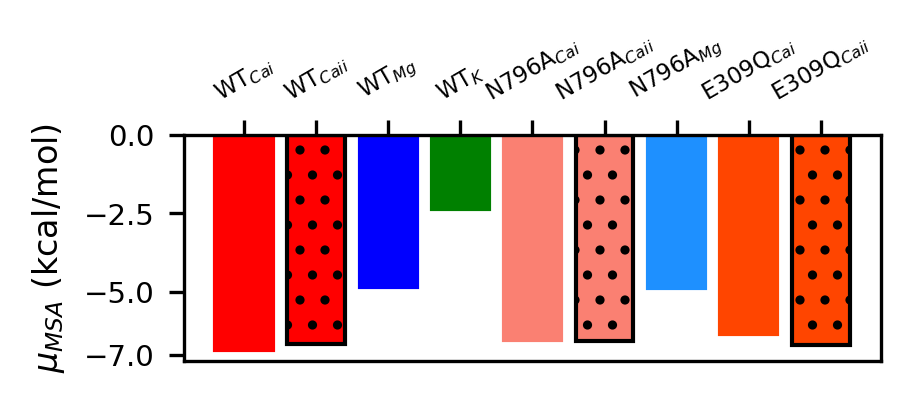

In [36]:
# now incorporate MSA predicted affinity (mu_Ca-->Mg) into MSM (chemical potential kcal/mol)
n796a_caii = -6.53970126 
n796a_cai = -6.50561758
wt_cai = -6.85428484 
e309q_cai= -6.3212282  
wt_caii= -6.63463859 
e309q_caii= -6.67248817

wt_mg =-4.84109333
n796a_mg = -4.88086608

wt_k = -2.35047274
width=0.8
site2index=[1,5,8]
site1index=[0,2,3,4,6,7]
color=['red','red','blue','green','salmon','salmon','dodgerblue','orangered','orangered']
matplotlib.rcParams['figure.figsize']=(3,1)
matplotlib.rcParams['figure.dpi'] = 300
barlist=plt.bar(np.arange(9),[wt_cai,wt_caii,wt_mg,wt_k,n796a_cai,n796a_caii,n796a_mg,e309q_cai,e309q_caii],width,hatch="..")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=True,         # ticks along the top edge are off
    labelbottom=False,
    labeltop=True)

plt.xticks(np.arange(9),["WT$_{Cai}$","WT$_{Caii}$","WT$_{Mg}$","WT$_{K}$","N796A$_{Cai}$",\
                         "N796A$_{Caii}$","N796A$_{Mg}$","E309Q$_{Cai}$","E309Q$_{Caii}$"],fontsize=5.5,rotation=30)
plt.ylabel("$\mu_{MSA}$ (kcal/mol)",fontsize=8)
plt.yticks([0,-2.5,-5,-7],fontsize=7)
for i,j in enumerate(site1index):
    barlist[j].set_color(color[j])

for i,j in enumerate(site2index):
    barlist[j].set_color(color[j])
    barlist[j].set_edgecolor('black')


In [37]:
# the relation between affinity is -RTlnK = deltaG, and dossociation constant Kd = 1/K
def calc_kd(MSAmu):
    RT = 0.593 #kcal/mol
    Kd = np.exp(MSAmu/RT)
    return Kd
MSAkd_wt_Cai = calc_kd(wt_cai) 
MSAkd_wt_Caii = calc_kd(wt_caii)
MSAkd_wt_Mg = calc_kd(wt_mg)
MSAkd_wt_K = calc_kd(wt_k)

# Kd of Ca obtained from the rate parameter for ref[25]_Cantilina1993
ref25kd_wt_Cai = 16/4e8
ref25kd_wt_Caii = 4e2/1e8

In [38]:
print ("wt Ca i", MSAkd_wt_Cai)
print ("wt Ca ii",MSAkd_wt_Caii)
print ("wt Mg",MSAkd_wt_Mg)
print ("wt K",MSAkd_wt_K)

print ("ref25 wt Ca i",ref25kd_wt_Cai)
print ("ref25 wt Ca ii",ref25kd_wt_Caii)

wt Ca i 9.552963959468203e-06
wt Ca ii 1.383566760086822e-05
wt Mg 0.00028479742259898374
wt K 0.018992754653340327
ref25 wt Ca i 4e-08
ref25 wt Ca ii 4e-06


In [39]:
# suppose there exists a scale factor 'lambda' between MSA predicted 
# Ca Kd values and ref25 Kd values
# let diff = (MSAkd_wt_Cai - lambda*ref25_wt_Cai)**2 - (MSAkd_wt_Caii - lambda*ref25_wt_Caii)**2
# solve equation diff = 0 --> get lambda --> use lamda to scale MSAkd_wt_Mg and MSA_wt_K
from sympy.solvers import solve
from sympy import Symbol

x = Symbol('x')
lambda1,lambda2 = solve((4e-08 - x*9.55e-6)**2  - (4e-06 -x*1.38e-5)**2,x)




In [40]:
print (lambda1,lambda2)
print (lambda1*MSAkd_wt_Mg)
print (lambda1*MSAkd_wt_K)


0.173019271948608 0.931764705882353
4.92754427109162e-5
0.00328611258241948


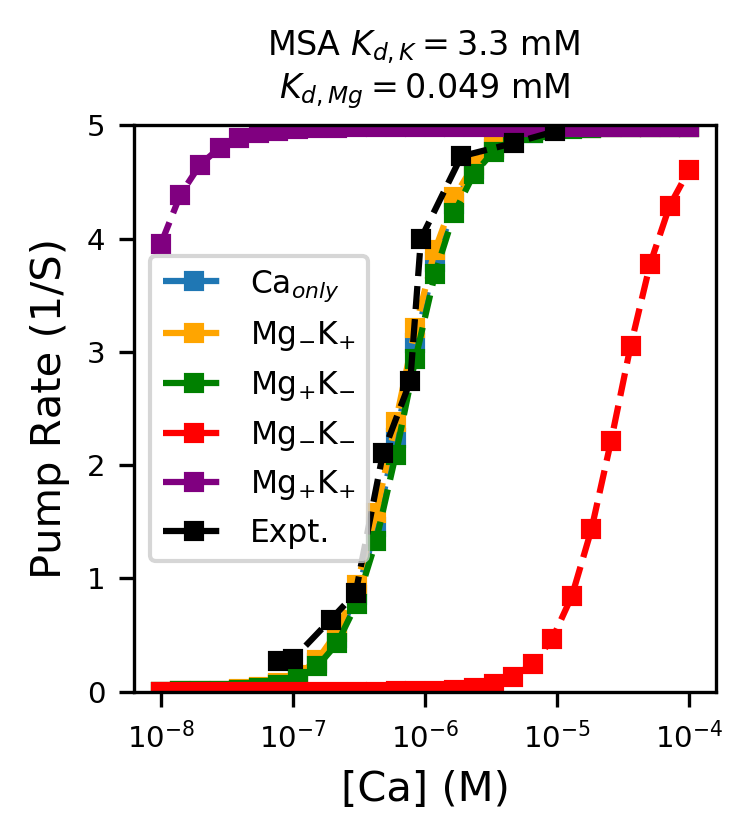

In [42]:
matplotlib.rcParams['figure.figsize']=2.5,2.5
plt.plot(cs,vcRate(cs,15,7.5,7.5,7000000000),"--s",ms=4,label="Ca$_{only}$") # Now we know the value of K5 and K6
plt.plot(cs,vMgIKT_Rate(cs,0.002,lambda1*MSAkd_wt_Mg,0.15,lambda1*MSAkd_wt_K),"--s",color="orange",ms=4,label=legends[0])
plt.plot(cs,vMgTKI_Rate(cs,0.002,lambda1*MSAkd_wt_Mg,0.15,lambda1*MSAkd_wt_K),"--s",color="green",ms=4,label=legends[1])
plt.plot(cs,vMgIKI_Rate(cs,0.002,lambda1*MSAkd_wt_Mg,0.15,lambda1*MSAkd_wt_K),"--s",color="red",ms=4,label=legends[2])
plt.plot(cs,vMgTKT_Rate(cs,0.002,lambda1*MSAkd_wt_Mg,0.15,lambda1*MSAkd_wt_K),"--s",color="purple",ms=4,label=legends[3])
plt.plot(c0,r0,"--s",ms=4,color='black',label="Expt.")
plt.xscale('log')
plt.legend(fontsize=7.5)
plt.xlabel('[Ca] (M)')
plt.ylim([0,5])
plt.xticks(xtickss,fontsize=7)
plt.yticks(fontsize=7)
plt.ylabel('Pump Rate (1/S)')
plt.title('MSA $K_{d,K} = 3.3$ mM \n$K_{d,Mg}=0.049$ mM',fontsize=8)
plt.savefig("77.png", bbox_inches='tight')

In [43]:
# now study the turnover rate for WT and N796A and E309Q mutants
# we already determined the scaling factor to account the difference between MSA predicted Ca KDs 
# and Catlina's Ca KDs.

# 1) fitst get MSA prediected Ca KDs for N796A and E309Q and then type the scaling factor lambda1

MSAkd_n796a_Cai = lambda1*calc_kd(n796a_cai) 
MSAkd_n796a_Caii = lambda1*calc_kd(n796a_caii)

MSAkd_e309q_Cai = lambda1*calc_kd(e309q_cai)
MSAkd_e309q_Caii = lambda1*calc_kd(e309q_caii)
#MSAkd_wt_Mg = calc_kd(wt_mg)
#MSAkd_wt_K = calc_kd(wt_k)

# 2) then the affinity for two Ca are (which corresponds to K1=kf1/kb1 and K3=kf3/kb3)
# in the Ca_only model
N796A_Cai_affinity = 1/MSAkd_n796a_Cai
N796A_Caii_affinity = 1/MSAkd_n796a_Caii

E309Q_Cai_affinity = 1/MSAkd_e309q_Cai
E309Q_Caii_affinity = 1/MSAkd_e309q_Caii


In [44]:
# redefine Ca_only model with different Ca KDs
# where nK1 and nK3 are new Ca affinititys.
def newcRate(Ca,nK1,nK3,kf5,kb5,kf6,kb6):
   
     
    af1=kf5*nK1*K2*nK3*K4*Ca*Ca*MgATP/(1+nK1*Ca+nK1*K2*Ca+nK1*K2*nK3*Ca*Ca+nK1*K2*nK3*K4*Ca*Ca*MgATP)
    ab1=kb5*MgADP/(1+Kd/Cai+Kd*Kd/(Cai*Cai))
    af2=(kf6*Kd*Kd/(Cai*Cai))/(1+(Kd/Cai)+Kd*Kd/(Cai*Cai))
    ab2=kb6*Pi/(1+nK1*Ca+nK1*K2*Ca+nK1*K2*nK3*Ca*Ca+nK1*K2*nK3*K4*Ca*Ca*MgATP)
    
    return (af1*af2-ab1*ab2)/(ab1+ab2+af1+af2)

vnewcRate = np.vectorize(newcRate)

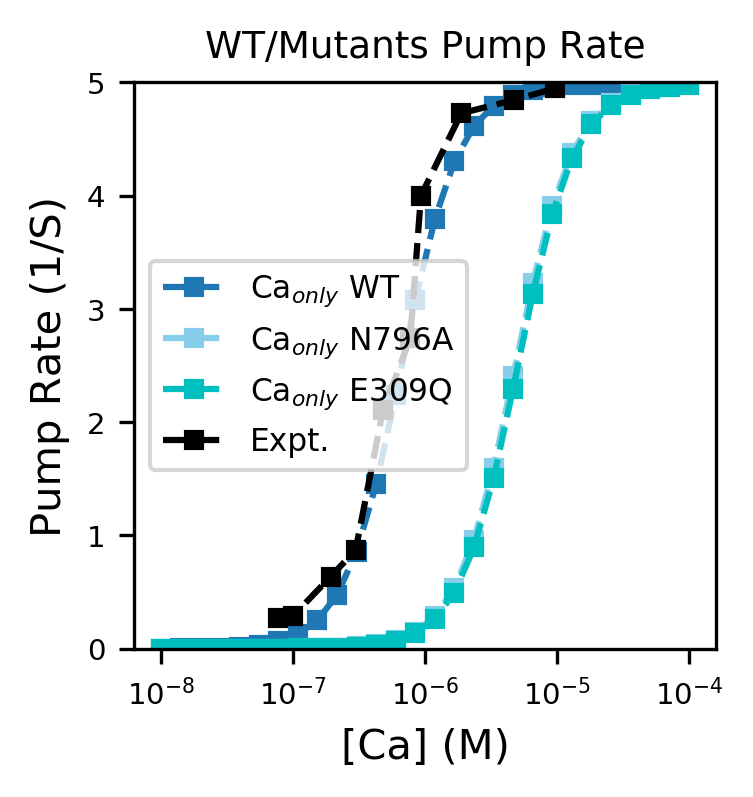

In [53]:

plt.plot(cs,vnewcRate(cs,K1,K3,15,7.5,7.5,7000000000),"--s",ms=4,label="Ca$_{only}$ WT") # Now we know the value of K5 and K6
plt.plot(cs,vnewcRate(cs,N796A_Cai_affinity,N796A_Caii_affinity,15,7.5,7.5,7000000000),"--s",color='skyblue',ms=4,label="Ca$_{only}$ N796A") # Now we know the value of K5 and K6
plt.plot(cs,vnewcRate(cs,E309Q_Cai_affinity,E309Q_Caii_affinity,15,7.5,7.5,7000000000),"--s",color='c',ms=4,label="Ca$_{only}$ E309Q") # Now we know the value of K5 and K6
plt.plot(c0,r0,"--s",ms=4,color='black',label="Expt.")
plt.xscale('log')
plt.legend(fontsize=7.5)
plt.xlabel('[Ca] (M)')
plt.ylim([0,5])
plt.xticks(xtickss,fontsize=7)
plt.yticks(fontsize=7)
plt.ylabel('Pump Rate (1/S)')
plt.title('WT/Mutants Pump Rate',fontsize=9)
plt.savefig("88.png", bbox_inches='tight')

In [94]:
# print the MSA predicted affinity for N796A and E309Q
print (N796A_Cai_affinity,N796A_Caii_affinity)
print (E309Q_Cai_affinity,E309Q_Caii_affinity)
#print (c0)
#print (E309Q_Cai_affinity)

336058.190801763 355939.590430256
246248.460104631 445271.847787469


In [98]:
# now compute the dfference between model predicted rate and experimental rate data

def check_rate_difference(model,variant=None): # for caonly model
    summ=0
    exptCa=np.asarray(c0) #experimental concentration of [Ca] used
    exptData=np.asarray(r0)
    yp=[]
    if variant == "N796A":
        yp = model(cs,336058.190801763,355939.590430256,15,7.5,7.5,7000000000) # here we copy the values of N796A_Cai/Caii affinity
    elif variant == "E309Q":
        yp = model(cs,246248.460104631,445271.847787469,15,7.5,7.5,7000000000) #here we copy the values of N796A_Cai/Caii affinity
    elif variant == "zero":
        yp = model(cs,K1,K3,15,7.5,7.5,7000000000)

    
    predicted= np.interp(exptCa,cs,yp)
    summ += np.sum( (exptData - predicted)**2)
    
    return np.sqrt(summ/len(exptCa))



In [100]:
WTcaonlydiff= check_rate_difference(vnewcRate,variant="zero")
N796Acaonlydiff= check_rate_difference(vnewcRate,variant="N796A")
E309Qcaonlydiff= check_rate_difference(vnewcRate,variant="E309Q")

In [101]:
print (WTcaonlydiff,N796Acaonlydiff,E309Qcaonlydiff)

0.3112830635127042 2.2406870890006636 2.26848666819841


In [104]:
def check_rate_difference_mgk_model(model,Type=None):
    MSAKD=[4.92754427109162e-5,0.00328611258241948]
    EXPKD=[0.0005,0.009]
    summ=0
    exptCa=np.asarray(c0) #experimental concentration of [Ca] used
    exptData=np.asarray(r0)
    if Type == "MSA":
        yp = model(cs,0.002,MSAKD[0],0.15,MSAKD[1]) # using MSA predicted kdmg,kdK
    elif Type == "EXP":
        yp = model(cs,0.002,EXPKD[0],0.15,EXPKD[1]) # using experimental kdmg,kdk
    
    predicted= np.interp(exptCa,cs,yp)
    summ += np.sum( (exptData - predicted)**2)
    
    return np.sqrt(summ/len(exptCa))


In [106]:
#MSA difference
MSA_mgikt = check_rate_difference_mgk_model(vMgIKT_Rate,Type="MSA")
MSA_mgtki = check_rate_difference_mgk_model(vMgTKI_Rate,Type="MSA")
MSA_mgiki = check_rate_difference_mgk_model(vMgIKI_Rate,Type="MSA")
MSA_mgtkt = check_rate_difference_mgk_model(vMgTKT_Rate,Type="MSA")

# EXPT difference 
EXP_mgikt = check_rate_difference_mgk_model(vMgIKT_Rate,Type="EXP")
EXP_mgtki = check_rate_difference_mgk_model(vMgTKI_Rate,Type="EXP")
EXP_mgiki = check_rate_difference_mgk_model(vMgIKI_Rate,Type="EXP")
EXP_mgtkt = check_rate_difference_mgk_model(vMgTKT_Rate,Type="EXP")

3.065485816446266
[0.10154445 0.73094029 0.74000886 0.08584975 0.12140517 0.99600164
 1.         0.25823334 0.38128249 0.75607548 0.98399792]


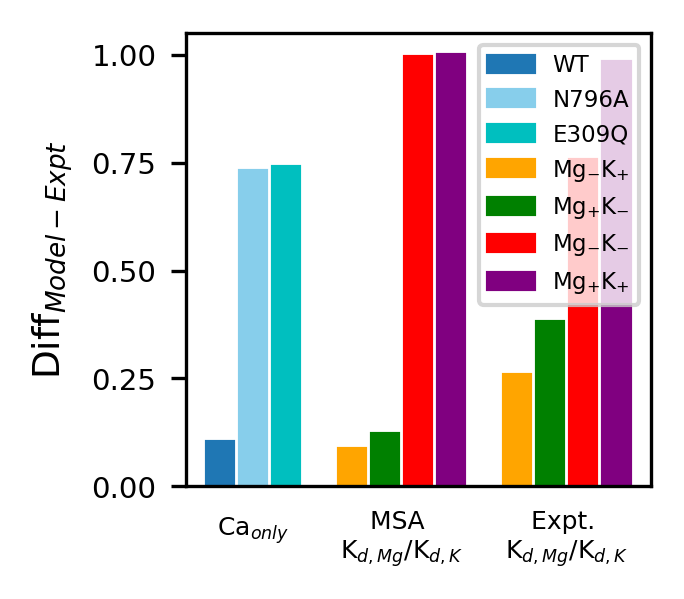

In [135]:
matplotlib.rcParams['figure.figsize']=2,2
#matplotlib.rcParams['figure.dpi']=300

color=['#1f77b4','skyblue','c','orange','green','red','purple','orange','green','red','purple']
width=0.8
diffvalue=(WTcaonlydiff,N796Acaonlydiff,E309Qcaonlydiff,MSA_mgikt,MSA_mgtki,MSA_mgiki,MSA_mgtkt,\
          EXP_mgikt,EXP_mgtki,EXP_mgiki,EXP_mgtkt)
print (np.max(diffvalue))
new=np.asarray(diffvalue)
print (new/np.max(diffvalue))
#chivalue= chivalue/np.maximum(chivalue)

ind=[0,1,2,4,5,6,7,9,10,11,12]
barlist=plt.bar(ind,new/np.max(diffvalue))
for i in np.arange(11):
    barlist[i].set_color(color[i])
plt.ylabel("Diff$_{Model -Expt}$",fontsize=9)
plt.yticks(fontsize=7)
plt.legend((barlist[0],barlist[1],barlist[2],barlist[3],barlist[4],barlist[5],barlist[6]),\
           ("WT","N796A","E309Q","Mg$_{-}$K$_{+}$","Mg$_{+}$K$_{-}$","Mg$_{-}$K$_{-}$","Mg$_{+}$K$_{+}$")\
          ,fontsize=5.5)

plt.xticks([1,5.5,10.5],["Ca$_{only}$","MSA \nK$_{d,Mg}$/K$_{d,K}$","Expt. \nK$_{d,Mg}$/K$_{d,K}$"],fontsize=6)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
plt.savefig("55.png", bbox_inches='tight')

In [137]:
print (new/np.max(diffvalue))
print (new)

[0.10154445 0.73094029 0.74000886 0.08584975 0.12140517 0.99600164
 1.         0.25823334 0.38128249 0.75607548 0.98399792]
[0.31128306 2.24068709 2.26848667 0.26317118 0.37216582 3.0532289
 3.06548582 0.79161064 1.16881607 2.31773866 3.01643167]


In [149]:
print (cs[12])

5.994842503189409e-07
